In [1]:
#%%
import os
import shutil
import random
from site import execsitecustomize
import numpy as np
import pandas as pd
import sys

from datetime import datetime

import math

import matplotlib.pyplot as plt
import csv
import re

import seaborn as sns


In [3]:
# dirList = os.listdir('.')
# folders = [f for f in dirList if os.path.isdir(f)]
# folders.sort()
# for f in folders:
#     print(f'Folder: {f}')
#     if os.path.exists(f): 
#         evalRegionSampling(os.path.normpath(f))
#         print('----------------------------')
#     else:
#         print('folder does not seem to exist')
# # writeOutput(output, outFilePath)

In [4]:
# # folders = ["./T0.7_d20"]
# dirList = os.listdir('.')
# folders = [f for f in dirList if os.path.isdir(f)]

# for folder in folders:
#     dirList = os.listdir(folder)
#     scalarSamples = [f for f in dirList if 'scalquant_all_reg1' in f]
#     # print(dirList)
#     if len(scalarSamples) == 0:
#         print(f'no relevant files found in folder {folder}.')
#     else:
#         print(f"folder: {folder}")
#         for sample in scalarSamples:
#         # sample = scalarSamples[-1]
#             samplePath = os.path.join(folder, sample)
#             sampledf = pd.read_csv(samplePath, delimiter='\s+')

#             sampledf["rho[0]"].plot()
#     plt.show()


In [5]:
# # folders = ["./T0.7_d20"]
# dirList = os.listdir('.')
# folders = [f for f in dirList if os.path.isdir(f)]


# fig, ax = plt.subplots()
# # ax2 = ax.twinx()



# for folder in folders:
#     dirList = os.listdir(folder)
#     scalarSamples = [f for f in dirList if 'scalquant_all_reg1' in f]
#     # print(dirList)
#     if len(scalarSamples) == 0:
#         print(f'no relevant files found in folder {folder}.')
#     else:
#         maxTimeStep =  int(re.findall(r'\d+', sorted(scalarSamples)[-1])[1])
#         print(f'max timestep = {maxTimeStep}')

#         print(f"folder: {folder}")
#         for sample in scalarSamples:
#         # sample = scalarSamples[-1]
#             timeStep = int(re.findall(r'\d+', sample)[1]) 

#             samplePath = os.path.join(folder, sample)
#             sampledf = pd.read_csv(samplePath, delimiter='\s+')

#             sampledf.plot(x="pos", y="rho[0]", ax=ax, c=plt.cm.viridis(timeStep/ maxTimeStep))
#             ax.get_legend().remove()

        

max timestep = 9000
folder: T0.7_r6_d6
t = 1000


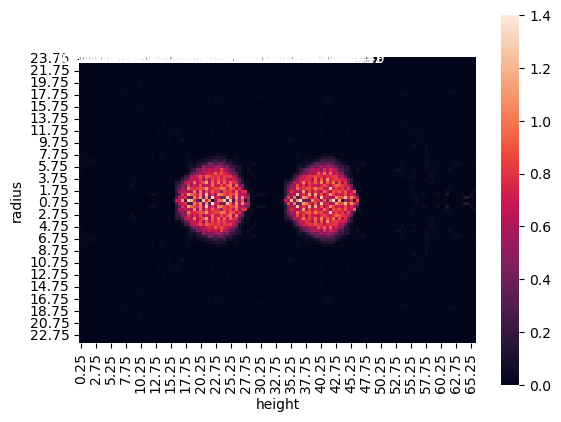

t = 2000


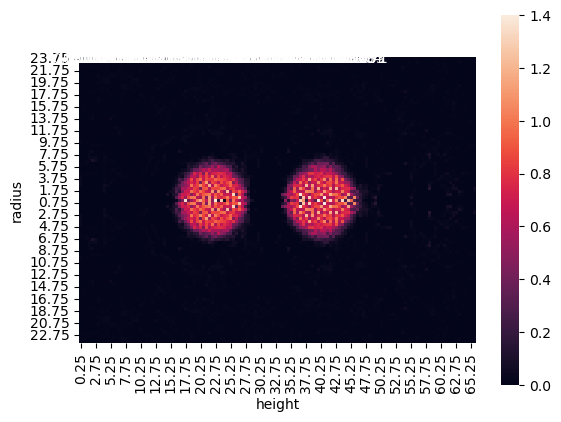

t = 3000


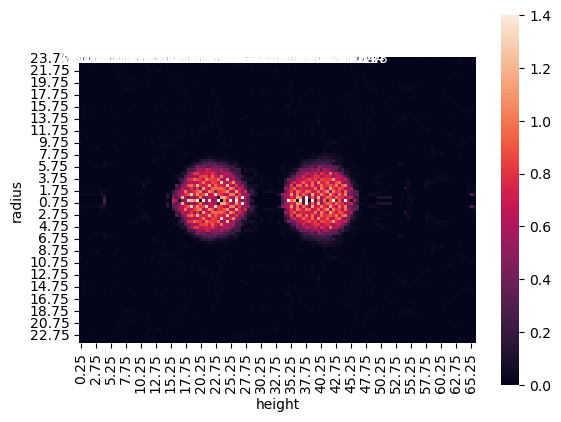

t = 4000


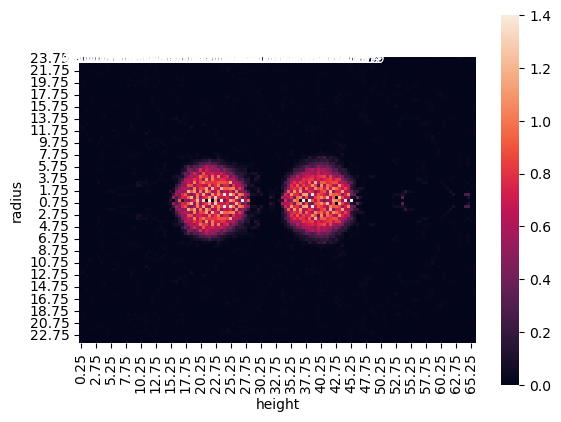

t = 5000


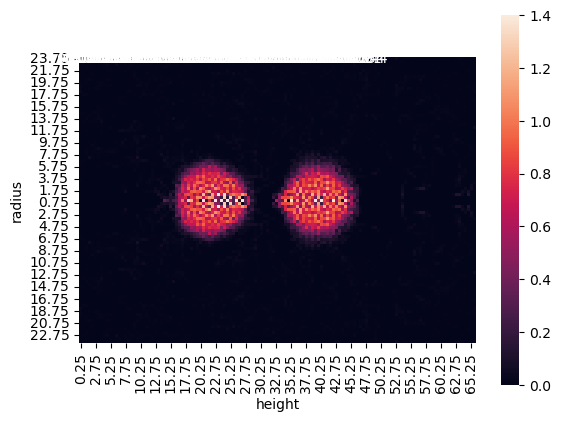

t = 6000


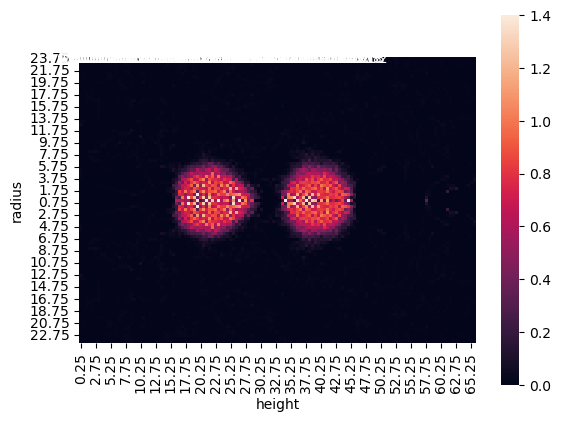

t = 7000


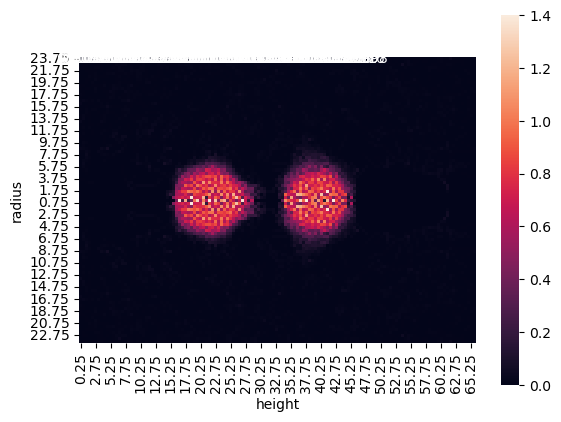

t = 8000


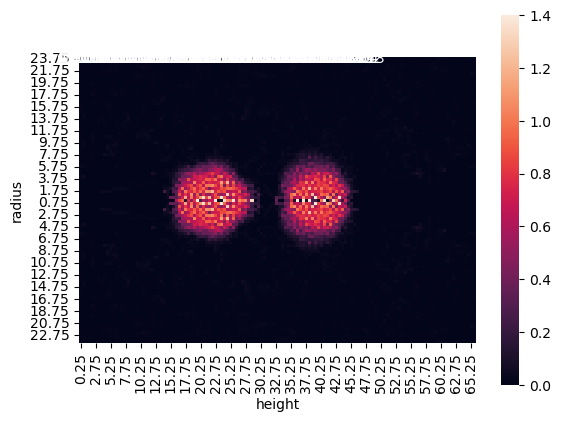

t = 9000


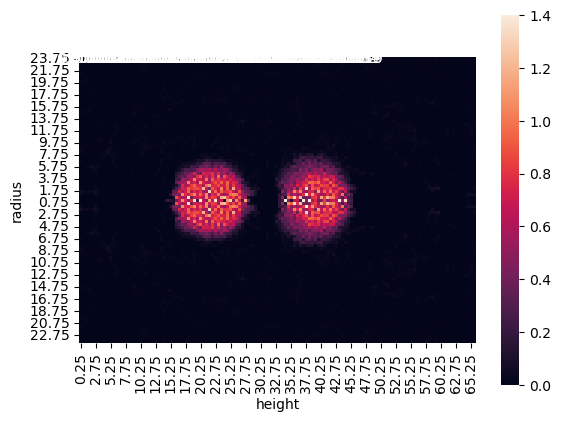

In [7]:
# folder = "_oldRuns/T0.7_r12_d2" # TESTCASE, functional
folder = "T0.7_r6_d6"

dirList = os.listdir(folder)
scalarSamples = [f for f in dirList if 'CylindricSampling' in f]
# print(dirList)
if len(scalarSamples) == 0:
    print(f'no relevant files found in folder {folder}.')
else:
    fig, ax = plt.subplots()
    scalarSamples = sorted(scalarSamples)
    maxTimeStep =  int(re.findall(r'\d+', scalarSamples[-1])[0])
    print(f'max timestep = {maxTimeStep}')

    print(f"folder: {folder}")
    for sample in scalarSamples:
        # sample = scalarSamples[-1]
        timeStep = int(re.findall(r'\d+', sample)[0]) 

        samplePath = os.path.join(folder, sample)
        sampledf = pd.read_csv(samplePath, delimiter='\s+')
        #  height,  radius, numParts, rho, T,   ekin, p,  T_r,   T_y, T_t,   v_r,   v_y, v_t, p_r, p_y,     p_t, numSamples

        heatmapDF = sampledf.pivot(index='radius', columns='height', values='rho')
        heatmapUpper = heatmapDF.copy(deep = True).iloc[::-1]
        heatmapUpper = heatmapUpper.drop(min(heatmapUpper.index))
        symHeatmap = pd.concat([heatmapUpper, heatmapDF])
        print(f't = {timeStep}')
        ax = sns.heatmap(symHeatmap,annot=True, square=True,vmin=0, vmax=1.4)
        plt.show()
        
        # sampledf[sampledf["radius"]<2].plot(x="height", y="rho", ax=ax, c=plt.cm.viridis(timeStep/ maxTimeStep))
        # ax.get_legend().remove()

    

In [39]:
dirList = os.listdir('.')
folders = [f for f in dirList if os.path.isdir(f)]
sims = [f for f in folders if f.startswith('T')]

sims = ["T0.7_r6_d3.5"]

for simdir in sims:
    print(f'directory: {simdir}')

    dirList = os.listdir(simdir)
    scalarSamples = [f for f in dirList if 'CylindricSampling' in f]
    # print(dirList)
    if len(scalarSamples) == 0:
        print(f'no relevant files found in directory {simdir}.')
    else:
        # idee:
        # gleitender average von zentraler schale
        # maximum = rhoLiq, minimum = rhoVap (zu ungenau?)
        # rhoGibbs = rhoLiq/2
        # rechtes und linkes maximum := punkt im tropfen
        # kriterium: dichte im zentralen punkt (oder ganze sehne zwischen rechtem und linken max) >= rhoGibbs
        # dist := abstand zwischen rhoGibbs rechts und links

        

        fig, ax = plt.subplots()
        scalarSamples = sorted(scalarSamples)
        maxTimeStep =  int(re.findall(r'\d+', scalarSamples[-1])[0])
        print(f'max timestep = {maxTimeStep}')

        print(f"folder: {simdir}")


        # scalarSamples = [scalarSamples[1]]



        for sample in scalarSamples:
            timeStep = int(re.findall(r'\d+', sample)[0]) 

            samplePath = os.path.join(simdir, sample)
            sampledf = pd.read_csv(samplePath, delimiter='\s+')
            #  height,  radius, numParts, rho, T,   ekin, p,  T_r,   T_y, T_t,   v_r,   v_y, v_t, p_r, p_y,     p_t, numSamples
            # print(sampledf)

            rhoDF = sampledf.pivot(index='radius', columns='height', values='rho')
            # heatmapUpper = heatmapDF.copy(deep = True).iloc[::-1]
            # print(rhoDF)
            rho = rhoDF.iloc[[0, 1, 2, 3, 4]].sum()
            rhoRollingNarrow = rho.rolling(window = 3, center = True).mean()
            rhoRollingWide = rho.rolling(window = 8, center = True).mean()
            rhoMax = rhoRollingWide.max()
            
            domainHeight = rho.iloc[-1]
            print(f'iloc -1: {rho.iloc[-1]}')
            print(rho)
            # print(rho[height>])

            # # plotting
            # ax = rho.plot()
            # ax = rhoRollingNarrow.plot()
            # ax = rhoRollingWide.plot()
            # plt.hlines(y=[rhoMax/2, rhoMax], xmin=0, xmax=60, colors = 'red',linestyles='--')
            # plt.show()

            # print(rhoDF)
            print(f't = {timeStep}')
            



directory: T0.7_r6_d3.5
max timestep = 30000
folder: T0.7_r6_d3.5
0.1522794495498307
height
0.25     0.130081
0.75     0.186960
1.25     0.223233
1.75     0.309345
2.25     0.135254
           ...   
61.25    0.000000
61.75    0.000000
62.25    0.293645
62.75    0.275141
63.25    0.152279
Length: 127, dtype: float64
t = 1000
0.0
height
0.25     0.029426
0.75     0.043290
1.25     0.097170
1.75     0.134988
2.25     0.114082
           ...   
61.25    0.000000
61.75    0.000000
62.25    0.000000
62.75    0.000000
63.25    0.000000
Length: 127, dtype: float64
t = 2000
0.02122065907885043
height
0.25     0.021221
0.75     0.013864
1.25     0.008771
1.75     0.028011
2.25     0.027162
           ...   
61.25    0.020938
61.75    0.021221
62.25    0.020938
62.75    0.021221
63.25    0.021221
Length: 127, dtype: float64
t = 3000
0.03237666270887467
height
0.25     0.045837
0.75     0.075715
1.25     0.078941
1.75     0.182667
2.25     0.168359
           ...   
61.25    0.000000
61.75    0.0

(0.7866611943875055, 0.007314397513485199)